In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import accuracy_score
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.neighbors import NearestNeighbors

Data Processing

In [ ]:
ds = tfds.load('lfw', split='train', as_supervised=True) #Get's the data in a tuple from tensroflow

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/lfw/0.1.0.incompleteCG49CQ/lfw-train.tfrecord


  0%|          | 0/13233 [00:00<?, ? examples/s]

Dataset lfw downloaded and prepared to /root/tensorflow_datasets/lfw/0.1.0. Subsequent calls will reuse this data.


In [ ]:
labels = np.array(list(map(lambda x: x[0], ds))) #Maps the label in an array with each element being a tensors

In [ ]:
labellist=[] #Makes a list of the labels with the elements being arrays now
for x in range(13233):
  labellist.append(np.array(labels[x]))

In [ ]:
labellist=np.array(labellist) #Makes the list of labels an array

In [ ]:
labelliststr=[] #Makes a list of labels with each element being a string now
for x in range(13233):
  labelliststr.append(str(labellist[x]))

In [ ]:
labellistarr=np.array(labelliststr) #Makes the list of labels an array

In [ ]:
from numpy import save #I saved the data so that I could run it from my computer as I ran out of ram on colab
np.save('labellistarr', labellistarr)

In [ ]:
numericlabel = pd.get_dummies(labellistarr) #Had to get a numeric value for all of the labels, this made it in one-hot encoding form

In [ ]:
endlabels=numericlabel.values.argmax(1)  #Got an array of numeric values where each name corresponds to a number

In [ ]:
np.save('endlabels', endlabels) #Saved it to run from computer

In [ ]:
images = np.array(list(map(lambda x: x[1], ds))) #Maps the images in an array with each element being an array of an image

In [ ]:
np.save('images', images) #Saved it to run from computer

In [ ]:
ramshort=np.unique(endlabels[0:297]) #Ran out of ram for all of the categories to be in the output layer, so I took a sample set with the all of the observations taht had the first 250 unique values as a label

In [ ]:
ramshort.shape

(250,)

In [ ]:
samplelabels=endlabels[0:297] #Grabs the first 297 values in the labels

In [ ]:
samplelabels = pd.get_dummies(samplelabels) #One-hot encodes it

In [ ]:
samplelabels=samplelabels.values.argmax(1) #Numeric values that corresponds to each unique name

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from numpy import load #Test out the loaded data
numericlabels = load('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/endlabels.npy')
imagedata = load('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/images.npy')
namedlabels = load('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/labellistarr.npy')

CNN

In [ ]:
model = Sequential( #This is for the actual complete data not the sample
    [
    Conv2D(32, (3,3), padding='valid', activation="relu", strides=1, input_shape=(250, 250, 3)),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(64, (3,3), padding='valid', activation="relu"),
    MaxPooling2D((2, 2), strides=2),
        
    Conv2D(128, (3,3), padding='valid', activation="relu"),
    MaxPooling2D((2, 2), strides=2),

    Flatten(),
    Dense(5749, activation="softmax")
]
)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics='accuracy') 

In [ ]:
model.fit(imagedata, numericlabels, epochs=10, batch_size=100) 

In [ ]:
model.save('C:/Users/poona/Downloads/ModelReal') #About 96% - Saved it - Might have to change the location

Load Model

In [ ]:
new_model = tf.keras.models.load_model('C:/Users/poona/Downloads/ModelReal') #Tested out the loaded model - Might have to change the location

In [ ]:
#new_model.fit(imagedata, numericlabels, epochs=1, batch_size=100) #See if the percents lined up

In [ ]:
ModelWOClass = Model(new_model.input, new_model.layers[-2].output) #Model without the classification layer

Similarity Search

In [ ]:
features = ModelWOClass.predict(imagedata) #Grabs the features from the model, when it flattens them

In [ ]:
np.save('features', features) #Saves the features after the images were sent trough the prediction model for easier access

In [4]:
features = load('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/features.npy')

In [5]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='auto', metric='minkowski').fit(features) #K-nearest neighbors with the top 5 images closest to the query image, the first one is going to be the query image
#The algorithm is auto so it finds the best spacial partitioning for the data, in this case I believe they use brute force, so there isn't any weights attached to the spaciel divide between the features
#The metric is minkowski, which is the distance method between the features

Albert Costa

In [6]:
distances, indices = neighbors.kneighbors([features[696]]) #Pick the image you want to query as the number reference
#distances shows the differences between that query image and the images the algorithm brings back, while indices shows theh actual image number

In [7]:
distances #Distances between query image and query results

array([[ 0.      , 92.281296, 97.677864, 98.11582 , 98.19637 , 98.40167 ]],
      dtype=float32)

In [8]:
indices #Image references

array([[  696,  2235,  5115,  4762, 10189,   693]])

"b'Albert_Costa'"

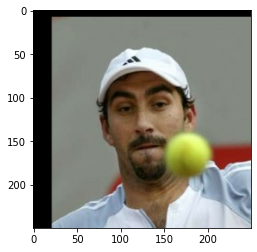

In [9]:
#Plot's first result from search - query image
plt.imshow(imagedata[indices[0,0]])
namedlabels[indices[0,0]]

"b'Roy_Halladay'"

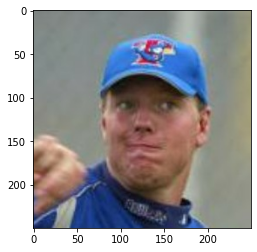

In [10]:
#Plot's second result from search
plt.imshow(imagedata[indices[0,1]])
namedlabels[indices[0,1]]

"b'Nicole'"

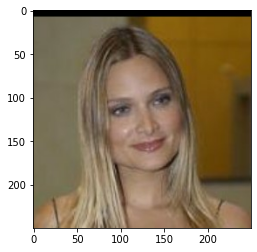

In [11]:
#Plot's third result from search
plt.imshow(imagedata[indices[0,2]])
namedlabels[indices[0,2]]

"b'Paris_Hilton'"

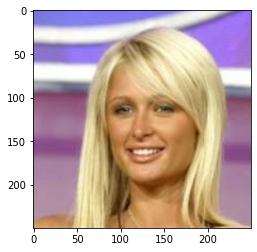

In [12]:
#Plot's fourth result from search
plt.imshow(imagedata[indices[0,3]])
namedlabels[indices[0,3]]

"b'Judi_Patton'"

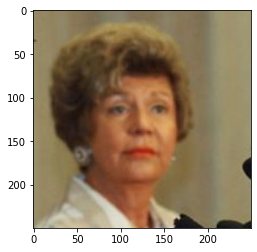

In [13]:
#Plot's fifth result from search
plt.imshow(imagedata[indices[0,4]])
namedlabels[indices[0,4]]

"b'Carol_Niedermayer'"

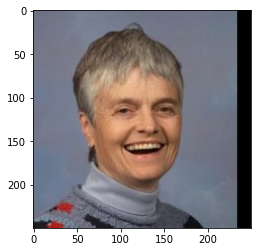

In [14]:
#Plot's sixth result from search
plt.imshow(imagedata[indices[0,5]])
namedlabels[indices[0,5]]

Angela Bassett

In [15]:
distances, indices = neighbors.kneighbors([features[327]]) #Pick the image you want to query as the number reference
#distances shows the differences between that query image and the images the algorithm brings back, while indices shows theh actual image number

In [16]:
distances

array([[  0.     , 151.97011, 152.28766, 152.52734, 152.75851, 152.83693]],
      dtype=float32)

In [17]:
indices

array([[  327,  4762,  5565, 12638,  5115,  8110]])

"b'Angela_Bassett'"

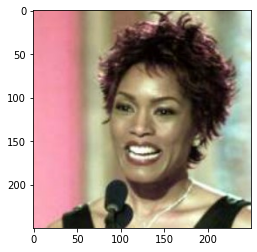

In [18]:
#Plot's first result from search - query image
plt.imshow(imagedata[indices[0,0]])
namedlabels[indices[0,0]]

"b'Paris_Hilton'"

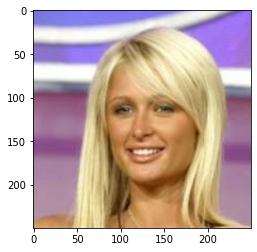

In [19]:
#Plot's second result from search
plt.imshow(imagedata[indices[0,1]])
namedlabels[indices[0,1]]

"b'Gustavo_Kuerten'"

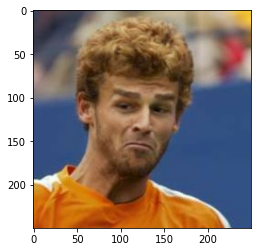

In [20]:
#Plot's third result from search
plt.imshow(imagedata[indices[0,2]])
namedlabels[indices[0,2]]

"b'Portia_de_Rossi'"

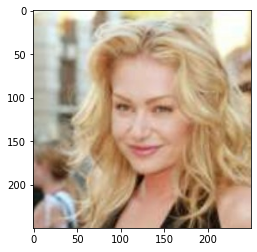

In [21]:
#Plot's fourth result from search
plt.imshow(imagedata[indices[0,3]])
namedlabels[indices[0,3]]

"b'Nicole'"

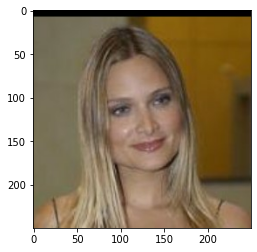

In [22]:
#Plot's fifth result from search
plt.imshow(imagedata[indices[0,4]])
namedlabels[indices[0,4]]

"b'Marie_Haghal'"

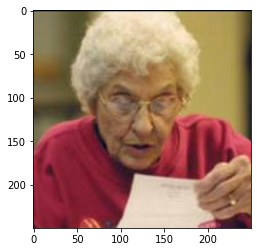

In [23]:
#Plot's sixth result from search
plt.imshow(imagedata[indices[0,5]])
namedlabels[indices[0,5]]

Arminio Fraga

In [24]:
distances, indices = neighbors.kneighbors([features[1516]]) #Pick the image you want to query as the number reference
#distances shows the differences between that query image and the images the algorithm brings back, while indices shows theh actual image number

In [25]:
distances #Distances between query image and query results

array([[2.6973983e-06, 2.1262671e+02, 2.1571875e+02, 2.1616309e+02,
        2.1644489e+02, 2.1743977e+02]], dtype=float32)

In [26]:
indices #Image references

array([[ 1516, 10321,  3234, 12101,  7226,  4964]])

"b'Arminio_Fraga'"

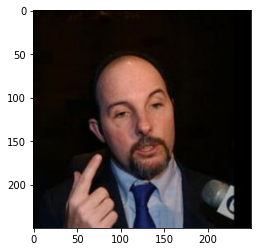

In [27]:
#Plot's first result from search - query image
plt.imshow(imagedata[indices[0,0]])
namedlabels[indices[0,0]]

"b'Donatella_Versace'"

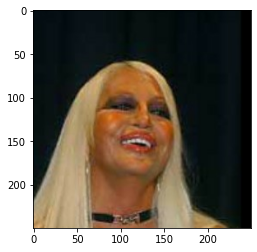

In [28]:
#Plot's second result from search
plt.imshow(imagedata[indices[0,1]])
namedlabels[indices[0,1]]

"b'Doug_Christie'"

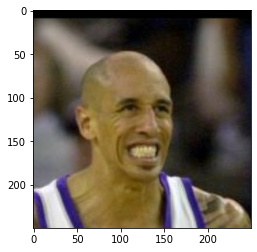

In [29]:
#Plot's third result from search
plt.imshow(imagedata[indices[0,2]])
namedlabels[indices[0,2]]

"b'Michael_J_Fox'"

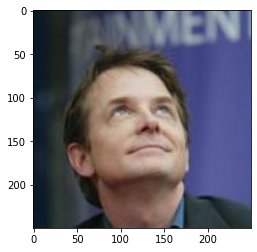

In [30]:
#Plot's fourth result from search
plt.imshow(imagedata[indices[0,3]])
namedlabels[indices[0,3]]

"b'Scott_Peterson'"

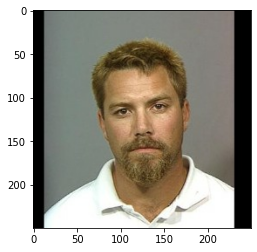

In [31]:
#Plot's fifth result from search
plt.imshow(imagedata[indices[0,4]])
namedlabels[indices[0,4]]

"b'Bob_Huggins'"

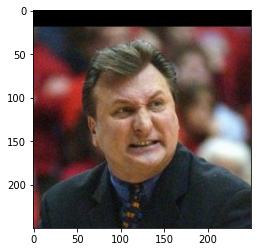

In [32]:
#Plot's sixth result from search
plt.imshow(imagedata[indices[0,5]])
namedlabels[indices[0,5]]

Billy Crystal

In [34]:
distances, indices = neighbors.kneighbors([features[1399]]) #Pick the image you want to query as the number reference
#distances shows the differences between that query image and the images the algorithm brings back, while indices shows theh actual image number

In [35]:
distances #Distances between query image and query results

array([[  0.     , 181.16249, 185.06892, 185.361  , 186.50133, 188.29718]],
      dtype=float32)

In [36]:
indices #Image references

array([[ 1399,  6412,   881, 11466,  9277,  7654]])

"b'Billy_Crystal'"

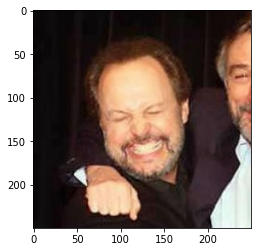

In [37]:
#Plot's first result from search - query image
plt.imshow(imagedata[indices[0,0]])
namedlabels[indices[0,0]]

"b'Duncan_Fletcher'"

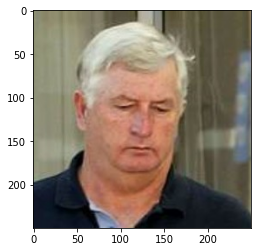

In [38]:
#Plot's second result from search
plt.imshow(imagedata[indices[0,1]])
namedlabels[indices[0,1]]

"b'Laura_Bush'"

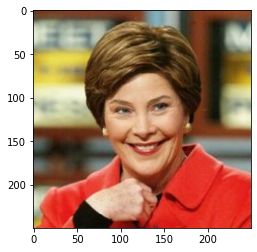

In [39]:
#Plot's third result from search
plt.imshow(imagedata[indices[0,2]])
namedlabels[indices[0,2]]

"b'Nathan_Doudney'"

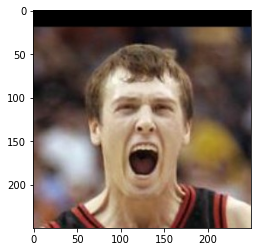

In [40]:
#Plot's fourth result from search
plt.imshow(imagedata[indices[0,3]])
namedlabels[indices[0,3]]

"b'George_Maxwell_Richards'"

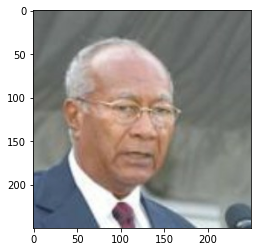

In [41]:
#Plot's fifth result from search
plt.imshow(imagedata[indices[0,4]])
namedlabels[indices[0,4]]

"b'John_Ashcroft'"

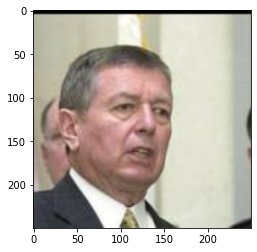

In [42]:
#Plot's sixth result from search
plt.imshow(imagedata[indices[0,5]])
namedlabels[indices[0,5]]

Bob Graham

In [43]:
distances, indices = neighbors.kneighbors([features[471]]) #Pick the image you want to query as the number reference
#distances shows the differences between that query image and the images the algorithm brings back, while indices shows theh actual image number

In [44]:
distances #Distances between query image and query results

array([[  0.      , 116.16687 , 116.82428 , 117.13084 , 117.338295,
        117.4963  ]], dtype=float32)

In [45]:
indices #Image references

array([[ 471, 2308, 9928, 5115, 8622, 4762]])

"b'Bob_Graham'"

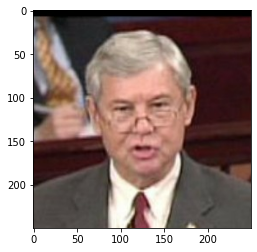

In [46]:
#Plot's first result from search - query image
plt.imshow(imagedata[indices[0,0]])
namedlabels[indices[0,0]]

"b'Enrique_Bolanos'"

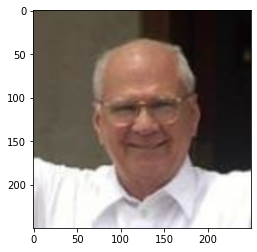

In [47]:
#Plot's second result from search
plt.imshow(imagedata[indices[0,1]])
namedlabels[indices[0,1]]

"b'Tommy_Lasorda'"

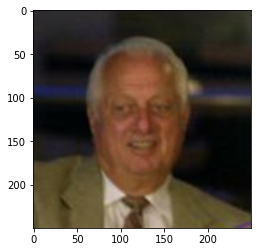

In [48]:
#Plot's third result from search
plt.imshow(imagedata[indices[0,2]])
namedlabels[indices[0,2]]

"b'Nicole'"

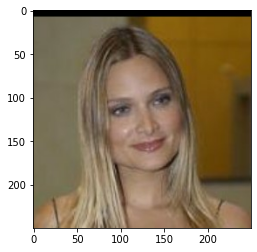

In [49]:
#Plot's fourth result from search
plt.imshow(imagedata[indices[0,3]])
namedlabels[indices[0,3]]

"b'John_Gordnick'"

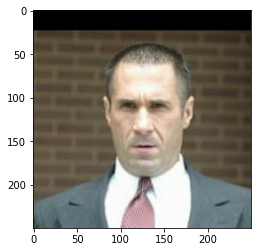

In [50]:
#Plot's fifth result from search
plt.imshow(imagedata[indices[0,4]])
namedlabels[indices[0,4]]

"b'Paris_Hilton'"

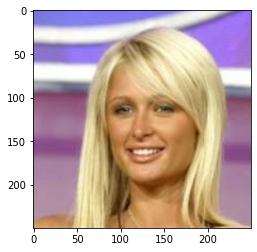

In [51]:
#Plot's sixth result from search
plt.imshow(imagedata[indices[0,5]])
namedlabels[indices[0,5]]

Boris Becker

In [53]:
distances, indices = neighbors.kneighbors([features[1866]]) #Pick the image you want to query as the number reference
#distances shows the differences between that query image and the images the algorithm brings back, while indices shows theh actual image number

In [54]:
distances #Distances between query image and query results

array([[  0.      , 113.52193 , 113.89866 , 114.190796, 114.41602 ,
        114.51266 ]], dtype=float32)

In [55]:
indices #Image references

array([[ 1866,  2771,  5115,  4762, 12395,  7203]])

"b'Boris_Becker'"

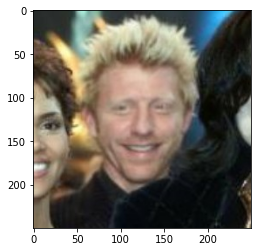

In [56]:
#Plot's first result from search - query image
plt.imshow(imagedata[indices[0,0]])
namedlabels[indices[0,0]]

"b'Yashwant_Sinha'"

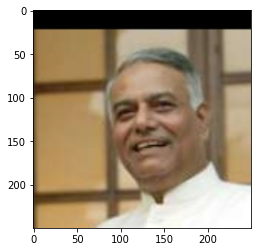

In [57]:
#Plot's second result from search
plt.imshow(imagedata[indices[0,1]])
namedlabels[indices[0,1]]

"b'Nicole'"

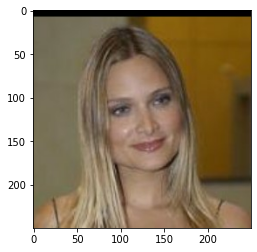

In [58]:
#Plot's third result from search
plt.imshow(imagedata[indices[0,2]])
namedlabels[indices[0,2]]

"b'Paris_Hilton'"

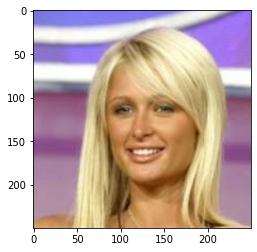

In [59]:
#Plot's fourth result from search
plt.imshow(imagedata[indices[0,3]])
namedlabels[indices[0,3]]

"b'Christopher_Russell'"

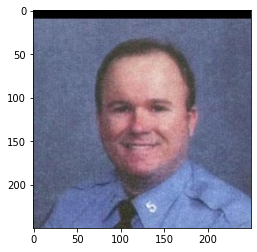

In [60]:
#Plot's fifth result from search
plt.imshow(imagedata[indices[0,4]])
namedlabels[indices[0,4]]

"b'Elizabeth_Smart'"

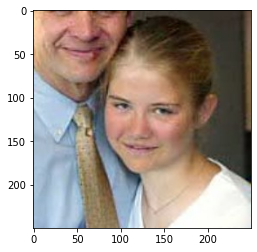

In [61]:
#Plot's sixth result from search
plt.imshow(imagedata[indices[0,5]])
namedlabels[indices[0,5]]

Bulent Ecevit

In [62]:
distances, indices = neighbors.kneighbors([features[295]]) #Pick the image you want to query as the number reference
#distances shows the differences between that query image and the images the algorithm brings back, while indices shows theh actual image number

In [63]:
distances #Distances between query image and query results

array([[  0.     , 141.4893 , 142.04968, 142.21562, 143.03131, 143.19685]],
      dtype=float32)

In [64]:
indices #Image references

array([[  295,  8161, 12395,  1339,  5045, 12608]])

"b'Bulent_Ecevit'"

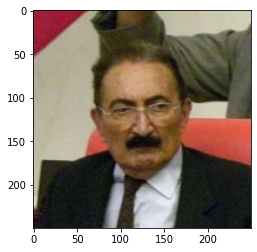

In [65]:
#Plot's first result from search - query image
plt.imshow(imagedata[indices[0,0]])
namedlabels[indices[0,0]]

"b'Laura_Bush'"

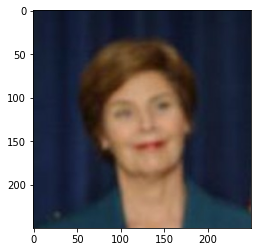

In [66]:
#Plot's second result from search
plt.imshow(imagedata[indices[0,1]])
namedlabels[indices[0,1]]

"b'Christopher_Russell'"

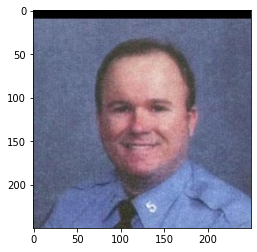

In [67]:
#Plot's third result from search
plt.imshow(imagedata[indices[0,2]])
namedlabels[indices[0,2]]

"b'Donald_Rumsfeld'"

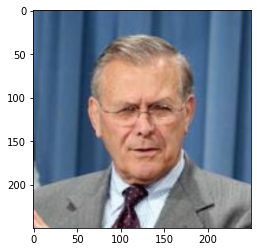

In [68]:
#Plot's fourth result from search
plt.imshow(imagedata[indices[0,3]])
namedlabels[indices[0,3]]

"b'Mahmoud_Abbas'"

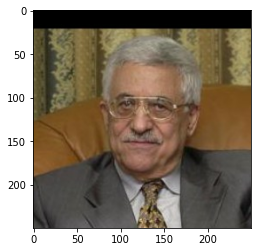

In [69]:
#Plot's fifth result from search
plt.imshow(imagedata[indices[0,4]])
namedlabels[indices[0,4]]

"b'James_Hill'"

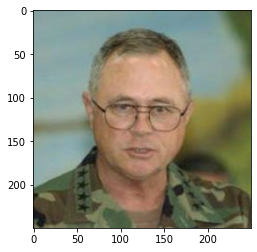

In [70]:
#Plot's sixth result from search
plt.imshow(imagedata[indices[0,5]])
namedlabels[indices[0,5]]

Calista Flockhard

In [71]:
distances, indices = neighbors.kneighbors([features[456]]) #Pick the image you want to query as the number reference
#distances shows the differences between that query image and the images the algorithm brings back, while indices shows theh actual image number

In [72]:
distances #Distances between query image and query results

array([[ 0.      , 80.320595, 81.715546, 82.15339 , 82.33598 , 82.4476  ]],
      dtype=float32)

In [73]:
indices #Image references

array([[  456, 11074,  8110,  5115,  8653,  8679]])

"b'Calista_Flockhart'"

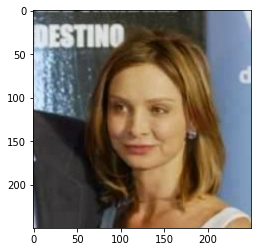

In [74]:
#Plot's first result from search - query image
plt.imshow(imagedata[indices[0,0]])
namedlabels[indices[0,0]]

"b'Freda_Black'"

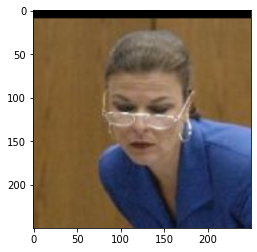

In [75]:
#Plot's second result from search
plt.imshow(imagedata[indices[0,1]])
namedlabels[indices[0,1]]

"b'Marie_Haghal'"

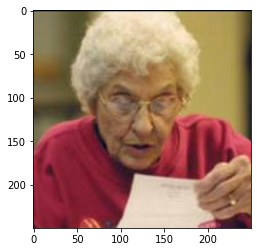

In [76]:
#Plot's third result from search
plt.imshow(imagedata[indices[0,2]])
namedlabels[indices[0,2]]

"b'Nicole'"

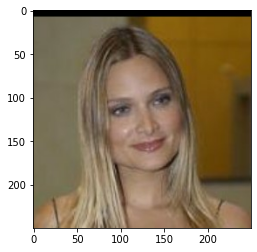

In [77]:
#Plot's fourth result from search
plt.imshow(imagedata[indices[0,3]])
namedlabels[indices[0,3]]

"b'Susie_Castillo'"

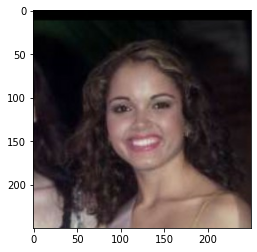

In [78]:
#Plot's fifth result from search
plt.imshow(imagedata[indices[0,4]])
namedlabels[indices[0,4]]

"b'Laura_Linney'"

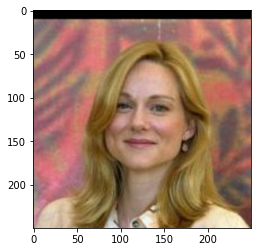

In [79]:
#Plot's sixth result from search
plt.imshow(imagedata[indices[0,5]])
namedlabels[indices[0,5]]

Cameron Diaz

In [80]:
distances, indices = neighbors.kneighbors([features[603]]) #Pick the image you want to query as the number reference
#distances shows the differences between that query image and the images the algorithm brings back, while indices shows theh actual image number

In [81]:
distances #Distances between query image and query results

array([[ 0.      , 68.328995, 71.53478 , 72.13164 , 72.56749 , 72.91465 ]],
      dtype=float32)

In [82]:
indices #Image references

array([[  603,  8952,  5115,  4762, 12395,  3018]])

"b'Cameron_Diaz'"

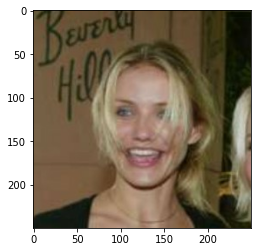

In [83]:
#Plot's first result from search - query image
plt.imshow(imagedata[indices[0,0]])
namedlabels[indices[0,0]]

"b'Tom_Schnackenberg'"

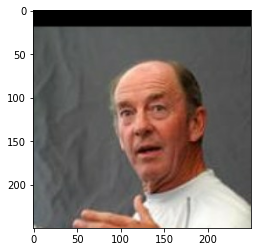

In [84]:
#Plot's second result from search
plt.imshow(imagedata[indices[0,1]])
namedlabels[indices[0,1]]

"b'Nicole'"

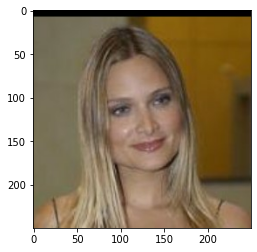

In [85]:
#Plot's third result from search
plt.imshow(imagedata[indices[0,2]])
namedlabels[indices[0,2]]

"b'Paris_Hilton'"

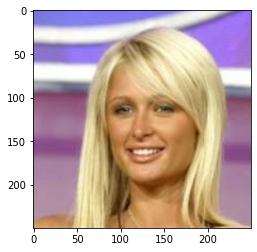

In [86]:
#Plot's fourth result from search
plt.imshow(imagedata[indices[0,3]])
namedlabels[indices[0,3]]

"b'Christopher_Russell'"

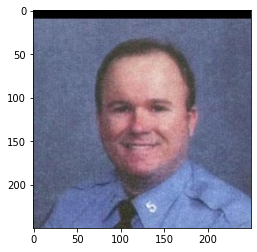

In [87]:
#Plot's fifth result from search
plt.imshow(imagedata[indices[0,4]])
namedlabels[indices[0,4]]

"b'John_Paul_II'"

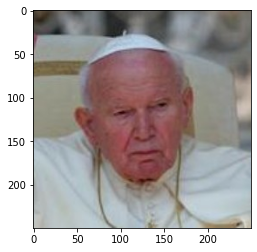

In [88]:
#Plot's sixth result from search
plt.imshow(imagedata[indices[0,5]])
namedlabels[indices[0,5]]

Carmen Electra

In [89]:
distances, indices = neighbors.kneighbors([features[630]]) #Pick the image you want to query as the number reference
#distances shows the differences between that query image and the images the algorithm brings back, while indices shows theh actual image number

In [90]:
distances #Distances between query image and query results

array([[1.6518123e-06, 7.1085968e+01, 7.1268349e+01, 7.1404716e+01,
        7.1503418e+01, 7.1649223e+01]], dtype=float32)

In [91]:
indices #Image references

array([[  630,  2571,  5115, 12790,  8110, 12395]])

"b'Carmen_Electra'"

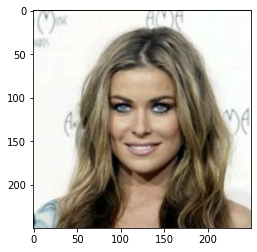

In [92]:
#Plot's first result from search - query image
plt.imshow(imagedata[indices[0,0]])
namedlabels[indices[0,0]]

"b'John_Howard'"

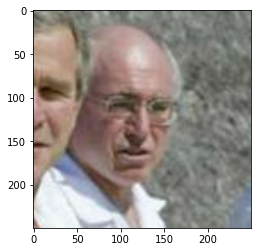

In [93]:
#Plot's second result from search
plt.imshow(imagedata[indices[0,1]])
namedlabels[indices[0,1]]

"b'Nicole'"

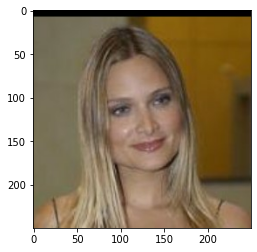

In [94]:
#Plot's third result from search
plt.imshow(imagedata[indices[0,2]])
namedlabels[indices[0,2]]

"b'Candice_Bergen'"

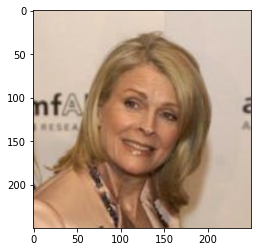

In [95]:
#Plot's fourth result from search
plt.imshow(imagedata[indices[0,3]])
namedlabels[indices[0,3]]

"b'Marie_Haghal'"

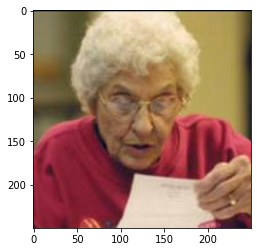

In [96]:
#Plot's fifth result from search
plt.imshow(imagedata[indices[0,4]])
namedlabels[indices[0,4]]

"b'Christopher_Russell'"

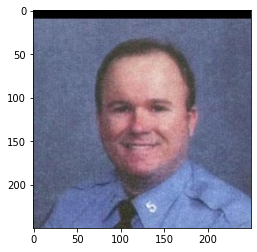

In [97]:
#Plot's sixth result from search
plt.imshow(imagedata[indices[0,5]])
namedlabels[indices[0,5]]